# Practice Assignment: Understanding Distributions Through Sampling

** *This assignment is optional, and I encourage you to share your solutions with me and your peers in the discussion forums!* **


To complete this assignment, create a code cell that:
* Creates a number of subplots using the `pyplot subplots` or `matplotlib gridspec` functionality.
* Creates an animation, pulling between 100 and 1000 samples from each of the random variables (`x1`, `x2`, `x3`, `x4`) for each plot and plotting this as we did in the lecture on animation.
* **Bonus:** Go above and beyond and "wow" your classmates (and me!) by looking into matplotlib widgets and adding a widget which allows for parameterization of the distributions behind the sampling animations.


Tips:
* Before you start, think about the different ways you can create this visualization to be as interesting and effective as possible.
* Take a look at the histograms below to get an idea of what the random variables look like, as well as their positioning with respect to one another. This is just a guide, so be creative in how you lay things out!
* Try to keep the length of your animation reasonable (roughly between 10 and 30 seconds).

<IPython.core.display.Javascript object>


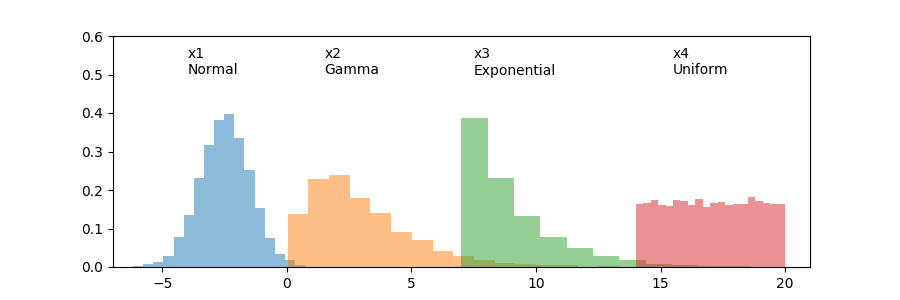

In [1]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib notebook

# generate 4 random variables from the random, gamma, exponential, and uniform distributions
x1 = np.random.normal(-2.5, 1, 10000)
x2 = np.random.gamma(2, 1.5, 10000)
x3 = np.random.exponential(2, 10000)+7
x4 = np.random.uniform(14,20, 10000)

# plot the histograms
plt.figure(figsize=(9,3))
plt.hist(x1, normed=True, bins=20, alpha=0.5)
plt.hist(x2, normed=True, bins=20, alpha=0.5)
plt.hist(x3, normed=True, bins=20, alpha=0.5)
plt.hist(x4, normed=True, bins=20, alpha=0.5);
plt.axis([-7,21,0,0.6])

plt.text(x1.mean()-1.5, 0.5, 'x1\nNormal')
plt.text(x2.mean()-1.5, 0.5, 'x2\nGamma')
plt.text(x3.mean()-1.5, 0.5, 'x3\nExponential')
plt.text(x4.mean()-1.5, 0.5, 'x4\nUniform')

In [3]:
import pandas as pd

df = pd.read_csv('heroes_information.csv')
del df['Unnamed: 0']
df.reset_index()
df.head()

,name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight
0,A-Bomb,Male,yellow,Human,No Hair,203.0,Marvel Comics,-,good,441.0
1,Abe Sapien,Male,blue,Icthyo Sapien,No Hair,191.0,Dark Horse Comics,blue,good,65.0
2,Abin Sur,Male,blue,Ungaran,No Hair,185.0,DC Comics,red,good,90.0
3,Abomination,Male,green,Human / Radiation,No Hair,203.0,Marvel Comics,-,bad,441.0
4,Abraxas,Male,blue,Cosmic Entity,Black,-99.0,Marvel Comics,-,bad,-99.0


In [4]:
physique = df[['name', 'Height', 'Weight']]
physique['Height'] = physique['Height'] * 0.01        # conversion from cm to m
physique['Weight'] = physique['Weight'] * 0.453592    # conversion from pound to kg
physique['BMI'] = physique['Weight']/(physique['Height']*physique['Height'])
physique.head()

/opt/conda/lib/python3.6/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
/opt/conda/lib/python3.6/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
/opt/conda/lib/python3.6/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pan

,name,Height,Weight,BMI
0,A-Bomb,2.03,200.034072,48.541356
1,Abe Sapien,1.91,29.483480,8.081873
2,Abin Sur,1.85,40.823280,11.927912
3,Abomination,2.03,200.034072,48.541356
4,Abraxas,-0.99,-44.905608,-45.817374


<IPython.core.display.Javascript object>


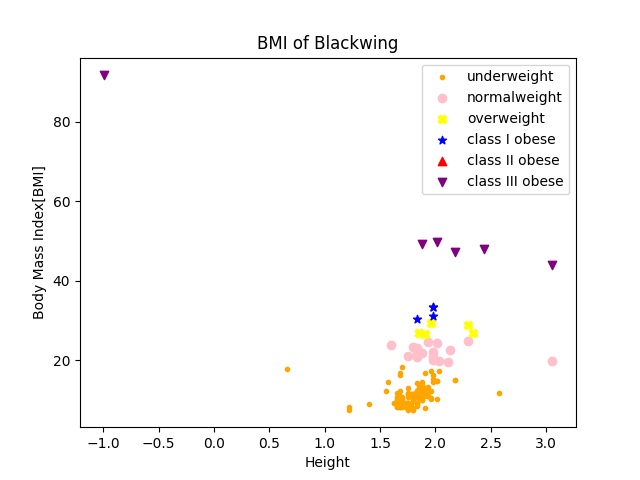

7

In [32]:
physique = physique[(physique['BMI']<200) & (physique['BMI']>0)]
weight_sample = physique.sample(n=200)
underweight = weight_sample[weight_sample['BMI']<18.5]
normalweight = weight_sample[(weight_sample['BMI']>=18.5) & (weight_sample['BMI']<25)]
overweight = weight_sample[(weight_sample['BMI']>=25) & (weight_sample['BMI']<30)]
obese1 = weight_sample[(weight_sample['BMI']>=30) & (weight_sample['BMI']<35)]
obese2 = weight_sample[(weight_sample['BMI']>=35) & (weight_sample['BMI']<40)]
obese3 = weight_sample[weight_sample['BMI']>=40]

plt.figure()
plt.gca().set_ylabel('Body Mass Index[BMI]')
plt.gca().set_xlabel('Height')
plt.scatter(underweight['Height'], underweight['BMI'], picker=5, marker='.', color='orange', label='underweight')
plt.scatter(normalweight['Height'], normalweight['BMI'], picker=5, marker='o', color='pink', label='normalweight')
plt.scatter(overweight['Height'], overweight['BMI'], picker=5, marker='X', color='yellow', label='overweight')
plt.scatter(obese1['Height'], obese1['BMI'], picker=5, marker='*', color='blue', label='class I obese')
plt.scatter(obese2['Height'], obese2['BMI'], picker=5, marker='^', color='red', label='class II obese')
plt.scatter(obese3['Height'], obese3['BMI'], picker=5, marker='v', color='purple',label='class III obese')
plt.legend()

def onpick(event):
    name = sample.iloc[event.ind[0]]['name']
    plt.gca().set_title('BMI of {}'.format(name))
plt.gcf().canvas.mpl_connect('pick_event', onpick)